In [47]:
import numpy as np
import pandas as pd

In [48]:
#https://www.shimmersensing.com/support/sample-data/
df=pd.read_csv('/Users/varun/Desktop/BeaverWorks/Week2Public/VarunNairHeartbeat.csv', sep=',',header=1)
df
df = df[5:6006]
df

,Duration:,2 0
5,'0:0:0.0,373
6,'0:0:0.02,362
7,'0:0:0.04,351
8,'0:0:0.06,346
9,'0:0:0.08,346
10,'0:0:0.1,347
11,'0:0:0.12,347
12,'0:0:0.14,348
13,'0:0:0.16,349
14,'0:0:0.18,349


In [49]:
ppg=df.values[:,1].astype(np.double)

In [50]:
ppg

array([373., 362., 351., ..., 384., 380., 377.])

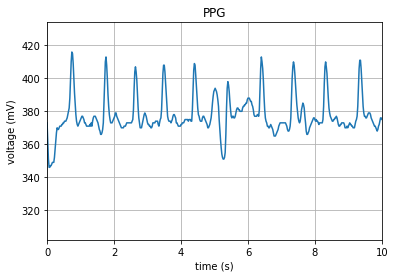

In [51]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fs = 50
t = np.arange(ppg.shape[0])/fs
ax.plot(t,ppg)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='PPG')
plt.xlim(0,10)
ax.grid()
fig.savefig("test.png")
plt.show()


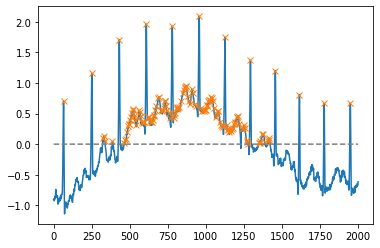

In [52]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

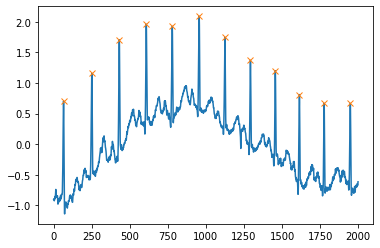

In [53]:
peaks, _ = find_peaks(x, distance=150)
np.diff(peaks)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

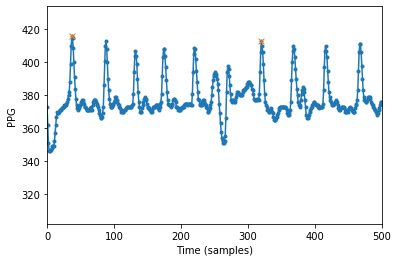

In [54]:
fs = 50
peaks, _ = find_peaks(ppg, distance=fs * 40 / 60)
plt.plot(ppg,'.-')
plt.plot(peaks, ppg[peaks], "x")
plt.xlim(0,500)
plt.ylabel('PPG')
plt.xlabel('Time (samples)')
plt.show()

In [55]:
np.diff(peaks) 

array([283, 194, 188, 243, 278, 235, 294, 253, 181, 173, 216, 287, 240,
       174, 287, 339, 333, 187, 190, 193, 197, 231, 290, 228, 242])

In [56]:
np.mean(np.diff(peaks) / fs * 60)

285.888

3.141592653589793

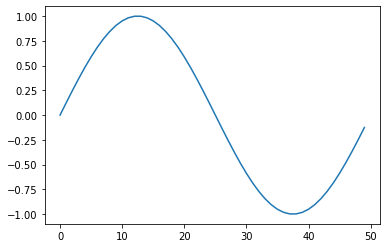

In [57]:
import matplotlib.pyplot as plt
fs = 50
f = 1
t = np.arange(50)
x = np.sin(t*2*np.pi*f/fs)
plt.plot(t,x)
np.pi

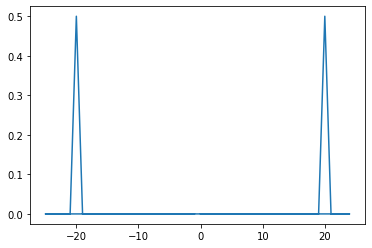

In [58]:
fs = 50
f = 20
t = np.arange(50)
x = np.sin(t*2*np.pi*f/fs)
sp = np.fft.fft(x)/x.shape[0]
freq = fs*np.fft.fftfreq(t.shape[-1])
plt.plot(freq, abs(sp))
plt.show()

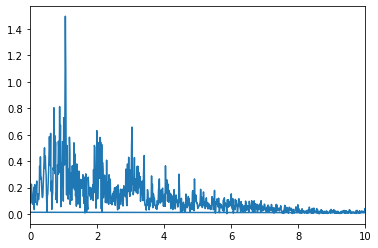

In [63]:
fs = 50
NFFT = 4096
sp = np.fft.fft(ppg - np.mean(ppg),NFFT)/ppg.shape[0]
t = np.arange(NFFT)
freq = fs*np.fft.fftfreq(t.shape[-1])
plt.plot(freq, abs(sp))
plt.xlim([0, 10])
plt.show()

In [60]:
freq[np.argmax(abs(sp))]

1.0498046875

In [61]:
1/freq[np.argmax(abs(sp))]*60

57.15348837209303

In [71]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(df.values[:,1].astype(np.double), distance=fs*40/60)
60/ (np.mean(np.diff(peaks)) / 50)

62.45802552048355

In [73]:
def find_hr(path):
    df=pd.read_csv(path, sep=',',header=1)
    df = df[5:6006]
    peaks, _ = find_peaks(df.values[:,1].astype(np.double), distance=fs*40/60)
    return 60/ (np.mean(np.diff(peaks)) / 50)

print(find_hr('/Users/varun/Desktop/BeaverWorks/Week2Public/VarunNairHeartbeat.csv'))

62.45802552048355
